# Location Analysis for <span style="color:#75b239">Veggie Grill</span> in Toronto, CA
<br>
<img src="https://cdn.pixabay.com/photo/2020/04/21/02/32/buildings-5070537_960_720.jpg" width="600" align="left" alt="Toronto Skyline">

<a href="https://pixabay.com/photos/buildings-city-cityscape-skyscraper-5070537/">By lucasgeorgewendt from Pixabay</a>

**Disclaimer:** Please be aware that this is a mock project and decisions for **<span style="color:#75b239">Veggie Grill</span>** to expand to Toronto and the customer segmentation are not based on facts, but are made up for the purpose of this project.

## Table of Contents


#### 1. Introduction  
#### 2. Data  
#### 3. Methodology  
#### 4. Results & Discussion 
#### 5. Conclusion 


## 1. Introduction

This section gives an introduction to the restaurant chain Veggie Grill and the business problem to be solved by this project.

### Veggie Grill

**<span style="color:#75b239">Veggie Grill</span>** is a **fast-casual vegan restaurant chain** that operates in California, Oregon, Washington, Illinois, and Massachusetts. The **first** restaurant **opened in 2006** in Irvine, California, which has since grown to be the **largest vegetarian and vegan restaurant company in the U.S**.
The chain focuses on offering **only plant-based food**, with no meat, dairy, eggs, cholesterol, animal fat or trans fat.

### Business Problem

The owners of **<span style="color:#75b239">Veggie Grill</span>** have decided to **expand** into the **Canadian market**. Management of **<span style="color:#75b239">Veggie Grill</span>** has decided to choose Toronto as the city where the first restaurant should be opened in Canada.

To gain foothold in Toronto fast a suitable location in the center of Toronto for the first restaurant should be chosen. The management of **<span style="color:#75b239">Veggie Grill</span>** now approached **Capstone Data Science** to analyze the ideal location, based on two criteria:
<br>
1. **Attractiveness:** Attractiveness of the neighborhood based on potential customers. Based on a customer segmentation done by **<span style="color:#75b239">Veggie Grill</span>** some months ago they identified that their customers are between the age of 15 to 45. Furthermore their main revenue stream comes from employees who go out for lunch during lunch break.
2. **Competition:** Overall competition of vegan/vegetarian restaurants in the area.

## 2. Data

This section gives an overview about the methodology how the project will be approached and the data and according data sources that will be needed to solve the business problem.

### Overview

 To determine a suitable location mainly 4 data sources will be used:  
 1. **Foursquare Venue Data:** For competition data Foursquare will be used to build competition clusters based on density of vegan/vegetarian restaurants located in a neighborhood. The data will be retrieved via the Foursquare API.
 2. **Toronto Economic Data:** Toronto economics data will be used to determine how many business are located in a neighborhood, since **<span style="color:#75b239">Veggie Grill's</span>** main revenue stream comes from employees who go out for lunch. The data will be retrieved via the website of the city of Toronto: https://open.toronto.ca/dataset/wellbeing-toronto-economics/.
 3. **Toronto Demographics Data:** Toronto population data will be used to determine how many of the customers in the identified age group between 15 to 45 years are located in a neighborhood. The data will be retrieved via the website of the city of Toronto:  https://open.toronto.ca/dataset/wellbeing-toronto-demographics/
 4. **Toronto Location Data:** To plot the high potential neighborhoods on a map, location data for longitude and latitude values will be downloaded from the Toronto website as well: https://open.toronto.ca/dataset/neighbourhoods/. Generating the data via geocoder is not possible without bigger efforts, since the neighborhood names cannot be easily found via geocoder.
 


### Data Analysis

We will conduct basically two analyses based on clustering, which will result in a competition clustering and a attractiveness clustering. Both clustering exercises will then be combined to derive a conclusion which neighborhoods have the highest potential to open a first restaurant.

All relevant data of the above mentioned data sources will be combined into one data frame and then be plotted on a Toronto map with meaningful color coding so that the relevant neighborhoods can be instantly identified.

## 3. Methodology

This section contains the data preparation and data analysis to derive a meaningful conclusion.

In [1]:
# Import of all necessary libraries for this analysis
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import requests
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
print('Libraries imported.')

Libraries imported.


### Toronto Economics Data

I downloaded the data from the City of Toronto website to my local PC.

In [2]:
df_eco = pd.read_csv(r"C:\Users\rhass\Desktop\Github\Coursera_Capstone\wellbeing-toronto-economics.csv")
df_eco.head()

,Neighbourhood,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,West Humber-Clairville,1,2463,195,719,317508,58271,2912
1,Mount Olive-Silverstone-Jamestown,2,271,60,687,251119,3244,6561
2,Thistletown-Beaumond Heights,3,217,25,718,414216,1311,1276
3,Rexdale-Kipling,4,144,75,721,392271,1178,1323
4,Elms-Old Rexdale,5,67,60,692,233832,903,1683


We will only need the information on the businesses, so we will create a new data frame only containing relevant information.

In [3]:
df_eco = df_eco[['Neighbourhood','Neighbourhood Id', 'Businesses']]
df_eco.head()

,Neighbourhood,Neighbourhood Id,Businesses
0,West Humber-Clairville,1,2463
1,Mount Olive-Silverstone-Jamestown,2,271
2,Thistletown-Beaumond Heights,3,217
3,Rexdale-Kipling,4,144
4,Elms-Old Rexdale,5,67


### Toronto Demographics Data

I downloaded the data from the City of Toronto website to my local PC.

In [4]:
df_demo = pd.read_csv(r"C:\Users\rhass\Desktop\Github\Coursera_Capstone\wellbeing-toronto-population-total-2011-2016-and-age-groups-2016-1.csv")
df_demo.head()

,NeighbourhoodID,Neighbourhood,Total Area,0 to 04 years,0 to 14 years,05 to 09 years,10 to 14 years,100 years and over,15 to 19 years,20 to 24 years,...,65 to 69 years,65 years and over,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,85 years and over,90 to 94 years,95 to 99 years,Total Population - All Age Groups - 100% data
0,1.0,West Humber-Clairville,30.09,1540.0,5060.0,1720.0,1790.0,5.0,2325.0,3120.0,...,1595.0,4980.0,1185.0,885.0,700.0,400.0,615.0,160.0,50.0,33320.0
1,2.0,Mount Olive-Silverstone-Jamestown,4.60,2190.0,7090.0,2500.0,2415.0,0.0,2585.0,2655.0,...,1285.0,3560.0,885.0,630.0,465.0,225.0,300.0,70.0,10.0,32950.0
2,3.0,Thistletown-Beaumond Heights,3.40,540.0,1730.0,600.0,595.0,5.0,650.0,760.0,...,490.0,1880.0,375.0,335.0,320.0,225.0,350.0,100.0,20.0,10360.0
3,4.0,Rexdale-Kipling,2.50,560.0,1640.0,515.0,565.0,0.0,635.0,720.0,...,520.0,1730.0,350.0,295.0,270.0,205.0,300.0,85.0,15.0,10530.0
4,5.0,Elms-Old Rexdale,2.90,540.0,1805.0,605.0,660.0,0.0,690.0,750.0,...,415.0,1275.0,305.0,235.0,180.0,105.0,145.0,40.0,5.0,9460.0


We will only need the relevant age group between 15 to 45 years. Additionally we will sum all values together.

In [5]:
df_demo = df_demo[['Neighbourhood','NeighbourhoodID', '15 to 19 years','20 to 24 years','25 to 29 years','30 to 34 years','35 to 39 years','40 to 44 years']]
df_demo.head()

,Neighbourhood,NeighbourhoodID,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years
0,West Humber-Clairville,1.0,2325.0,3120.0,2785.0,2345.0,2035.0,1980.0
1,Mount Olive-Silverstone-Jamestown,2.0,2585.0,2655.0,2400.0,2250.0,2185.0,2275.0
2,Thistletown-Beaumond Heights,3.0,650.0,760.0,680.0,715.0,665.0,610.0
3,Rexdale-Kipling,4.0,635.0,720.0,715.0,680.0,640.0,680.0
4,Elms-Old Rexdale,5.0,690.0,750.0,600.0,575.0,550.0,540.0


Next let's build a sum of all residents between 15 to 45 and let's drop the rest of the columns.

In [6]:
df_demo['15 to 45 years']= df_demo[['15 to 19 years','20 to 24 years','25 to 29 years','30 to 34 years','35 to 39 years','40 to 44 years']].sum(axis=1)
df_demo = df_demo[['Neighbourhood','NeighbourhoodID','15 to 45 years']]
df_demo.head()

,Neighbourhood,NeighbourhoodID,15 to 45 years
0,West Humber-Clairville,1.0,14590.0
1,Mount Olive-Silverstone-Jamestown,2.0,14350.0
2,Thistletown-Beaumond Heights,3.0,4080.0
3,Rexdale-Kipling,4.0,4070.0
4,Elms-Old Rexdale,5.0,3705.0


### Location Data

I downloaded the data from the City of Toronto website to my local PC.

In [7]:
df_loc = pd.read_csv(r"C:\Users\rhass\Desktop\Github\Coursera_Capstone\Neighbourhoods.csv")
df_loc.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,5461,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,5462,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,5463,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,5464,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335240,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,5465,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408100,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


From this data source we only need the AREA_SHORT_CODE and the longitude and latitude values.

In [8]:
df_loc = df_loc[['AREA_SHORT_CODE','LONGITUDE','LATITUDE']]
df_loc.head()

,AREA_SHORT_CODE,LONGITUDE,LATITUDE
0,94,-79.425515,43.676919
1,100,-79.403590,43.704689
2,97,-79.397871,43.687859
3,27,-79.488883,43.765736
4,31,-79.457108,43.714672


In [9]:
# to make it easier to match the data later on we rename the area short code to neighborhood ID to be consistent
df_loc = df_loc.rename(columns={'AREA_SHORT_CODE': 'NeighbourhoodID'})

### Attractiveness Analysis

To analyze the attractiveness of a neighborhood, we will cluster them via k-means based on the population count and number of businesses present in the area. To do this we first have to create a combined data frame for the analysis.

In [10]:
# First we have to rename one of the neighborhood ID columns since they have different namings in both data frames.
df_eco = df_eco.rename(columns={'Neighbourhood Id': 'NeighbourhoodID'})

# Then we merge both data frames into one data fram
df_attr= df_eco.merge(df_demo, on=['NeighbourhoodID'])
df_attr.head()

,Neighbourhood_x,NeighbourhoodID,Businesses,Neighbourhood_y,15 to 45 years
0,West Humber-Clairville,1,2463,West Humber-Clairville,14590.0
1,Mount Olive-Silverstone-Jamestown,2,271,Mount Olive-Silverstone-Jamestown,14350.0
2,Thistletown-Beaumond Heights,3,217,Thistletown-Beaumond Heights,4080.0
3,Rexdale-Kipling,4,144,Rexdale-Kipling,4070.0
4,Elms-Old Rexdale,5,67,Elms-Old Rexdale,3705.0


In [11]:
# Next we drop the Neighbourhood_y column and rename the Neighborhood_x column
df_attr.drop(columns=['Neighbourhood_y'],inplace=True)
df_attr = df_attr.rename(columns={'Neighbourhood_x': 'Neighborhood'})
df_attr.head()

,Neighborhood,NeighbourhoodID,Businesses,15 to 45 years
0,West Humber-Clairville,1,2463,14590.0
1,Mount Olive-Silverstone-Jamestown,2,271,14350.0
2,Thistletown-Beaumond Heights,3,217,4080.0
3,Rexdale-Kipling,4,144,4070.0
4,Elms-Old Rexdale,5,67,3705.0


#### K-means clustering of neighborhoods - Attractiveness

To make the data comparable we standardize the values for businesses and the population using the standard scaler.

In [12]:
X = df_attr.values[:,2:]
StandardScaler()
scaled_data = StandardScaler().fit_transform(X)
scaled_data

array([[ 3.03446975e+00,  1.11600345e+00],
       [-4.17874502e-01,  1.07268780e+00],
       [-5.02923129e-01, -7.80861436e-01],
       [-6.17896272e-01, -7.82666255e-01],
       [-7.39169314e-01, -8.48542153e-01],
       [-5.92696679e-01,  3.40143946e-02],
       [-5.78521908e-01, -1.30224145e-01],
       [-7.15544695e-01, -8.99979498e-01],
       [-6.03721501e-01, -5.50746999e-01],
       [-7.28144492e-01, -8.72004802e-01],
       [-4.84023434e-01, -3.75679545e-01],
       [-6.77745305e-01, -9.53221662e-01],
       [-6.14746323e-01, -6.65353013e-01],
       [ 2.71947483e+00,  1.95343952e+00],
       [-5.37572569e-01, -1.00736624e+00],
       [ 9.24172576e-02,  1.28767398e-01],
       [ 1.30216647e-01,  1.32536247e+00],
       [-2.65101969e-01, -6.33768678e-01],
       [-5.76946933e-01, -7.53789150e-01],
       [-3.58025468e-01, -6.95132528e-01],
       [ 1.31774747e+00, -6.45500003e-01],
       [-2.55652122e-01, -3.55826535e-01],
       [-6.05296475e-01, -7.51081921e-01],
       [-3.

Next we use k-means clustering to cluster the neighborhoods into 7 clusters using our standardized data.

In [13]:
clusterNum = 7
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled_data)
labels = k_means.labels_
print(labels)

[5 2 0 0 0 2 2 0 0 0 0 0 0 5 0 2 1 0 0 0 6 0 0 2 2 6 5 0 0 2 6 2 2 0 2 2 2
 2 2 2 0 6 2 2 2 0 2 0 0 2 1 2 2 2 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 6 0 0 6 2
 5 4 3 5 0 2 2 1 0 2 2 2 2 2 0 2 0 2 1 0 5 0 0 2 2 2 0 0 0 1 0 0 2 0 0 0 2
 0 2 0 0 2 1 2 6 6 0 2 0 0 0 6 6 6 2 5 1 1 0 0 0 2 1 2 0 0]


Now that we have generated the labels for our neighborhoods, let's add them back to the initial data frame.

In [14]:
df_attr["Attractiveness"] = labels
df_attr

,Neighborhood,NeighbourhoodID,Businesses,15 to 45 years,Attractiveness
0,West Humber-Clairville,1,2463,14590.0,5
1,Mount Olive-Silverstone-Jamestown,2,271,14350.0,2
2,Thistletown-Beaumond Heights,3,217,4080.0,0
3,Rexdale-Kipling,4,144,4070.0,0
4,Elms-Old Rexdale,5,67,3705.0,0
...,...,...,...,...,...
135,West Hill,136,424,10465.0,2
136,Woburn,137,1073,22310.0,1
137,Eglinton East,138,296,8930.0,2
138,Scarborough Village,139,228,6635.0,0


To check that the labeling was implemented correctly, we plot the data on a scatterplot with color coding for the different clusters.

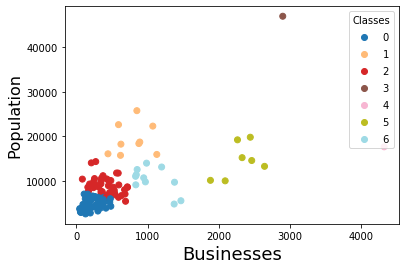

In [15]:
area = np.pi * ( X[:, 1])**4  
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cm.tab20)
plt.xlabel('Businesses', fontsize=18)
plt.ylabel('Population', fontsize=16)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

plt.show()

For a high-level overview, we can group the data set by attractiveness and display the mean values for each cluster.

In [16]:
df_attr.groupby('Attractiveness').mean()

,NeighbourhoodID,Businesses,15 to 45 years
Attractiveness,,,
0,69.015873,205.920635,4810.873016
1,96.000000,788.444444,19323.333333
2,66.708333,416.791667,8771.562500
3,77.000000,2899.000000,46945.000000
4,76.000000,4324.000000,17665.000000
5,60.000000,2301.857143,14619.285714
6,80.272727,1061.272727,10176.363636


#### Attractiveness Classification

Together with the management of **<span style="color:#75b239">Veggie Grill</span>** we defined text labels for the 7 different clusters. Each cluster was assigned to either having "high", "medium", or "low" attractiveness.  
1. **High Attractiveness:** As you can see in the scatterplot above cluster 3 and 4 mark exceptional neighborhoods, which were therefore classified as "high" potential. Cluster 5 was also labeled as "high", since it has a significant amount of businesses present which means more employees looking for lunch opportunities.  
2. **Medium Attractiveness:** Cluster 1, although higher in population than cluster 5 was classified as "medium" since it was lower in businesses located in these neighborhoods. The managementof **<span style="color:#75b239">Veggie Grill</span>** prioritized number of businesses over population, since they see more potential to serve workers during lunch time, than the local population going out for lunch or dinner. Cluster 6 was also labeled as medium since it has an adequate amount of businesses and population.
3. **Low Attractiveness:** The rest was classified as not attractive for opening the first restaurant.

In [17]:
mapping = {3:'high', 4:'high', 5:'high', 1:'medium', 6:'medium', 2:'low', 0:'low'}
df_attr= df_attr.replace({'Attractiveness': mapping})
df_attr.head(10)

,Neighborhood,NeighbourhoodID,Businesses,15 to 45 years,Attractiveness
0,West Humber-Clairville,1,2463,14590.0,high
1,Mount Olive-Silverstone-Jamestown,2,271,14350.0,low
2,Thistletown-Beaumond Heights,3,217,4080.0,low
3,Rexdale-Kipling,4,144,4070.0,low
4,Elms-Old Rexdale,5,67,3705.0,low
5,Kingsview Village-The Westway,6,160,8595.0,low
6,Willowridge-Martingrove-Richview,7,169,7685.0,low
7,Humber Heights-Westmount,8,82,3420.0,low
8,Edenbridge-Humber Valley,9,153,5355.0,low
9,Princess-Rosethorn,10,74,3575.0,low


### Competitive Analysis

To analyze the competition in the different neighborhoods we will use data from Foursquare to extract the venues per neighborhood, focusing on restaurants offering vegan and vegetarian food. Then the neighborhoods will be classified into high, medium, and low competitive neighborhoods.

#### Foursquare API request

In [18]:
# Credentials for API requests.
CLIENT_ID = 'SMB4TAZKRSNIXELA1GMJJ0PDHES3Y15Q1JTUUP2CDJURO1CM'
CLIENT_SECRET = 'TCCQVKRLMJ1BWJDXTI0VHDLDS2WRRA2ELGS35KGPH1IN5TMD'
VERSION = '20180605'
LIMIT = 50

In [19]:
# Function to generate venue data frame for neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['NeighbourhoodID', 
                  'LATITUDE',
                  'LONGITUDE', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# Generate venue data for neighborhoods
toronto_venues = getNearbyVenues(names=df_loc['NeighbourhoodID'],
                                   latitudes=df_loc['LATITUDE'],
                                   longitudes=df_loc['LONGITUDE']
                                  )

In [21]:
print(toronto_venues.shape)
toronto_venues.head()

(1886, 7)


,NeighbourhoodID,LATITUDE,LONGITUDE,Venue,Venue Latitude,Venue Longitude,Venue Category
0,94,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
1,94,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space
2,94,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park
3,94,43.676919,-79.425515,Marian Engel Park,43.673754,-79.423988,Park
4,100,43.704689,-79.403590,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym


#### One hot encoding

As you an see we now have a data frame including all relevant venues for Toronto neighborhoods. We will only need the sum of venues in a neighborhood and therefore use one hot encoding to get a binarization per venue category.

In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood ID column back to dataframe
toronto_onehot['NeighbourhoodID'] = toronto_venues['NeighbourhoodID'] 

toronto_onehot.head()

,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,NeighbourhoodID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100


We only need the venue category 'Vegetarian / Vegan Restaurant' for our analysis. Therefore we drop all the other columns.

In [23]:
df_comp = toronto_onehot[['NeighbourhoodID', 'Vegetarian / Vegan Restaurant']]
df_comp = df_comp.groupby('NeighbourhoodID').sum().reset_index()
df_comp= df_comp.sort_values(by=['Vegetarian / Vegan Restaurant'], ascending=False)
df_comp.head()

,NeighbourhoodID,Vegetarian / Vegan Restaurant
75,78,3
81,84,1
101,104,1
92,95,1
62,65,1


#### K-means clustering of neighborhoods - Competition

Now that we have the sum of vegetarian and vegan restaurants we can use k-means classification to classify our data into the three competition buckets: high, medium, and low competitive neighborhoods.

In [24]:
X = df_comp.values[:,1:]
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
df_comp["Competition"] = labels
df_comp.head()

,NeighbourhoodID,Vegetarian / Vegan Restaurant,Competition
75,78,3,2
81,84,1,1
101,104,1,1
92,95,1,1
62,65,1,1


In [25]:
# assigning the integer values to text labels
mapping = {2:'high', 1:'medium',0:'low'}
df_comp= df_comp.replace({'Competition': mapping})
df_comp.head(10)

,NeighbourhoodID,Vegetarian / Vegan Restaurant,Competition
75,78,3,high
81,84,1,medium
101,104,1,medium
92,95,1,medium
62,65,1,medium
77,80,1,medium
0,1,0,low
90,93,0,low
91,94,0,low
93,96,0,low


### Location Identification

We now have classified the neighborhoods based on attractiveness and competition. To derive a conclusion we have to bring both data sets together and define a logic to evaluate the neighborhoods and later on plot them on a map to identify the best neighborhood.

In [26]:
# merge the attractiveness and competition data frame to common data frame
df_final= df_attr.merge(df_comp, on=['NeighbourhoodID'])
df_final.head()

,Neighborhood,NeighbourhoodID,Businesses,15 to 45 years,Attractiveness,Vegetarian / Vegan Restaurant,Competition
0,West Humber-Clairville,1,2463,14590.0,high,0,low
1,Mount Olive-Silverstone-Jamestown,2,271,14350.0,low,0,low
2,Thistletown-Beaumond Heights,3,217,4080.0,low,0,low
3,Rexdale-Kipling,4,144,4070.0,low,0,low
4,Elms-Old Rexdale,5,67,3705.0,low,0,low


Now we define the logic to evaluate neighborhoods. Neighborhoods with high attractiveness and low competition are labeled as  excellenct locations. On the contrary neighborhoods with low attractiveness and high competition are labeled as poor locations. A label is defined for all 9 combinations below and then added to the data frame.

In [27]:
# now we define the logic to evaluate neighborhoods
conditions = [
    (df_final['Attractiveness'] == 'high') & (df_final['Competition'] == 'low'), # Excellent
    (df_final['Attractiveness'] == 'high') & (df_final['Competition'] == 'medium'), # Okay
    (df_final['Attractiveness'] == 'high') & (df_final['Competition'] == 'high'), # Poor
    (df_final['Attractiveness'] == 'medium') & (df_final['Competition'] == 'high'), # Poor
    (df_final['Attractiveness'] == 'medium') & (df_final['Competition'] == 'low'), # Good
    (df_final['Attractiveness'] == 'medium') & (df_final['Competition'] == 'medium'), # Poor
    (df_final['Attractiveness'] == 'low') & (df_final['Competition'] == 'high'), # Very Poor
    (df_final['Attractiveness'] == 'low') & (df_final['Competition'] == 'medium'), # Poor
    (df_final['Attractiveness'] == 'low') & (df_final['Competition'] == 'low')] # Poor
choices = ['Excellent','Okay','Poor','Poor','Good', 'Poor','Very Poor','Poor','Poor']
df_final['Location Choice'] = np.select(conditions, choices)
df_final.head(10)

,Neighborhood,NeighbourhoodID,Businesses,15 to 45 years,Attractiveness,Vegetarian / Vegan Restaurant,Competition,Location Choice
0,West Humber-Clairville,1,2463,14590.0,high,0,low,Excellent
1,Mount Olive-Silverstone-Jamestown,2,271,14350.0,low,0,low,Poor
2,Thistletown-Beaumond Heights,3,217,4080.0,low,0,low,Poor
3,Rexdale-Kipling,4,144,4070.0,low,0,low,Poor
4,Elms-Old Rexdale,5,67,3705.0,low,0,low,Poor
5,Kingsview Village-The Westway,6,160,8595.0,low,0,low,Poor
6,Humber Heights-Westmount,8,82,3420.0,low,0,low,Poor
7,Edenbridge-Humber Valley,9,153,5355.0,low,0,low,Poor
8,Princess-Rosethorn,10,74,3575.0,low,0,low,Poor
9,Eringate-Centennial-West Deane,11,229,6325.0,low,0,low,Poor


Before we can plot the data we now first need to match the neighborhoods to the according longitude and latitude values from the location data frame.

In [28]:
# merge final data frame with location data frame.
df_plot = df_final.merge(df_loc, on=['NeighbourhoodID'])
df_plot.head()

,Neighborhood,NeighbourhoodID,Businesses,15 to 45 years,Attractiveness,Vegetarian / Vegan Restaurant,Competition,Location Choice,LONGITUDE,LATITUDE
0,West Humber-Clairville,1,2463,14590.0,high,0,low,Excellent,-79.596356,43.716180
1,Mount Olive-Silverstone-Jamestown,2,271,14350.0,low,0,low,Poor,-79.587259,43.746868
2,Thistletown-Beaumond Heights,3,217,4080.0,low,0,low,Poor,-79.563491,43.737988
3,Rexdale-Kipling,4,144,4070.0,low,0,low,Poor,-79.566228,43.723725
4,Elms-Old Rexdale,5,67,3705.0,low,0,low,Poor,-79.548983,43.721519


## 4. Results & Discussion

This section presents the results of the analysis and the suggested neighborhoods. We will plot the neighborhoods on a map and select the best location for opening a first **<span style="color:#75b239">Veggie Grill</span>** restaurant in Toronto.

#### Results

In [29]:
# first let's find the longitude and latitude values for toronto to be able to position the map correctly.
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Now we can create the map with the neighborhoods based on the location choice classification. The locations are colored coded by the following logic:  
* **Excellent** is highlighted in **<font color='green'>green</font>**
* **Good** is highlighted in **<font color='#FFE135'>yellow</font>**
* **Okay** is hihglighted in **<font color='orange'>orange</font>**
* **Poor** and **very poor** are highlighted in **<font color='red'>red</font>**

In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# define function for adding color markers based on location classification.
def color(cluster): 
    if cluster == 'Excellent': 
        col = 'green'
    elif cluster == 'Good': 
        col = 'yellow'
    elif cluster == 'Okay': 
        col = 'orange'
    elif cluster == 'Poor': 
        col = 'red'
    else: 
        col='red'
    return col 

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, attr, comp in zip(df_plot['LATITUDE'], df_plot['LONGITUDE'], df_plot['Neighborhood'], df_plot['Location Choice'],df_plot['Attractiveness'],df_plot['Competition']):
    label = folium.Popup(str(poi) + ', Location Choice: ' + str(cluster) + ', Attr.: ' + str(attr)+ ', Comp.: ' + str(comp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color(cluster),
        fill=True,
        fill_color=color(cluster),
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Discussion

Let's now explore the 3 neighborhoods marked in green in the Toronto center further.  
These are the neighborhoods:  
* Waterfront Communities-The Island
* Bay Street Corridor
* Church-Yonge Corridor


In [31]:
neighborhoods = ['Waterfront Communities-The Island', 'Bay Street Corridor', 'Church-Yonge Corridor']
best_nh = df_plot.loc[df_plot['Neighborhood'].isin(neighborhoods)]
best_nh

,Neighborhood,NeighbourhoodID,Businesses,15 to 45 years,Attractiveness,Vegetarian / Vegan Restaurant,Competition,Location Choice,LONGITUDE,LATITUDE
72,Church-Yonge Corridor,75,2443,19815.0,high,0,low,Excellent,-79.379017,43.659649
73,Bay Street Corridor,76,4324,17665.0,high,0,low,Excellent,-79.385721,43.657511
74,Waterfront Communities-The Island,77,2899,46945.0,high,0,low,Excellent,-79.377202,43.633880


As you can see above Bay Street Corrider offers the most amount of businesses with a high population number of habitants between 15 to 45 years. Since it is located in the heart of Toronto, compared to Waterfront Communities-The Island, it should be preferred.

#### Limitations

There are a couple limitations to this analysis, which we will discuss in the following:
1. First of all the data that was provided by the city of Toronto is dated a between 3 for 6 years back. So we are not dealing with the most up to date data regarding the population and business information.
2. Secondly, we are only looking at explicitly vegan or vegetarian restaurants from Foursquare but neglecting restaurants offering vegetarian or vegan options. For a further deep dive this could be considered.
3. Last but not least, availability of a suitable restaurant location and rental fee levels of neighborhoods were not considered which could also have an impact on location choice.

## 5. Conclusion

To conclude **Capstone Data Science** suggests, due to the above analysis to open a first restaurant in the Bay Street Corridor neighborhood. Since both Church-Yonge Corridor and Bay Street Corridor are located next to each other, a location in between those neighborhoods could be chosen as well.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Bay_Street_May_2010.jpg/800px-Bay_Street_May_2010.jpg" width="600" align="left" alt="Bay Street Corridor">

<a href="https://commons.wikimedia.org/wiki/File:Bay_Street_May_2010.jpg">Image by mark.watmough from Wikipedia</a>

I hope you have enjoyed this project. It was not always an easy path to get to this point, starting from scratch. A big thanks to the Coursera and IBM data science team who created the <a href="https://www.coursera.org/professional-certificates/ibm-data-science?">IBM Data Science Professional Certificate</a> Course series. If you haven't taken their course yet and you consider the learning the basics of data science then definitely check out the course series.

Best regards from Germany,   
Ramin